In [160]:
#https://dl.acm.org/doi/10.1145/3383913.3383920
path=r"C:\Users\Emman\Desktop\JE\Ortho\OrthoCAD_Export_64406802\64406802_shell_occlusion_l.stl"


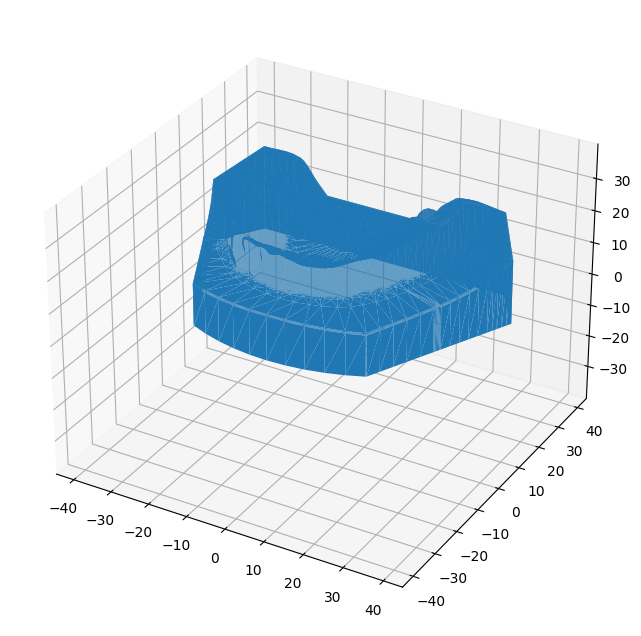

In [161]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(path)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

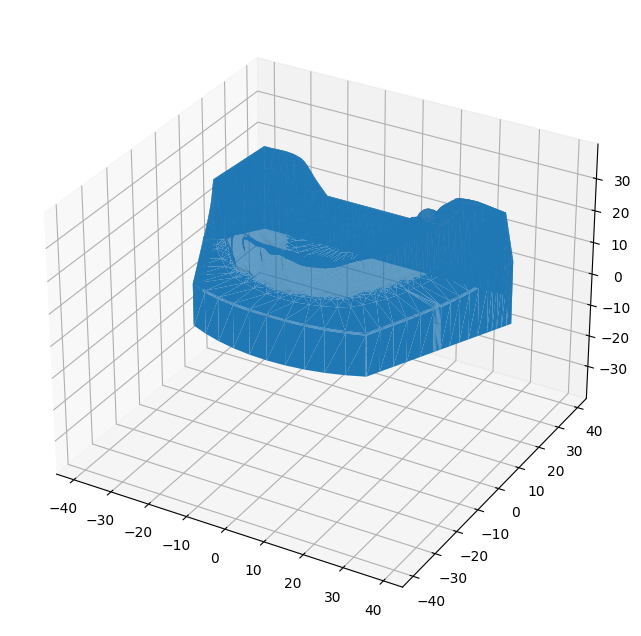

In [162]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot

# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(path)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors[:,::-1,:]))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

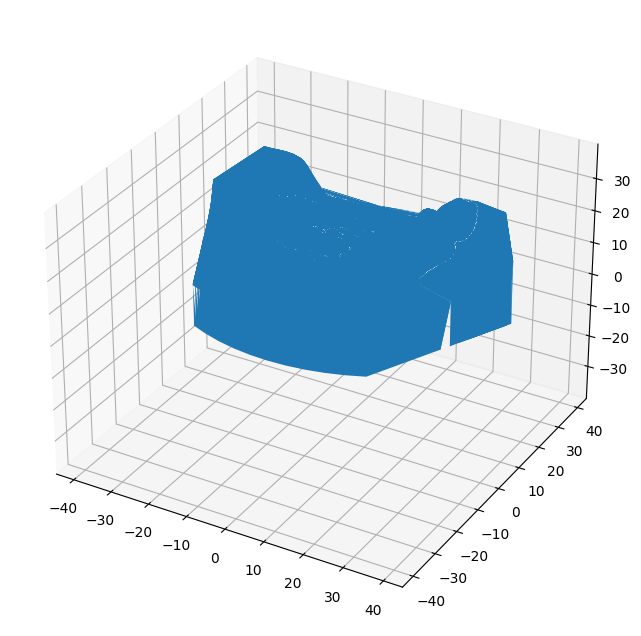

In [163]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import numpy as np
# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(path)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(np.swapaxes(your_mesh.vectors,0,1)))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

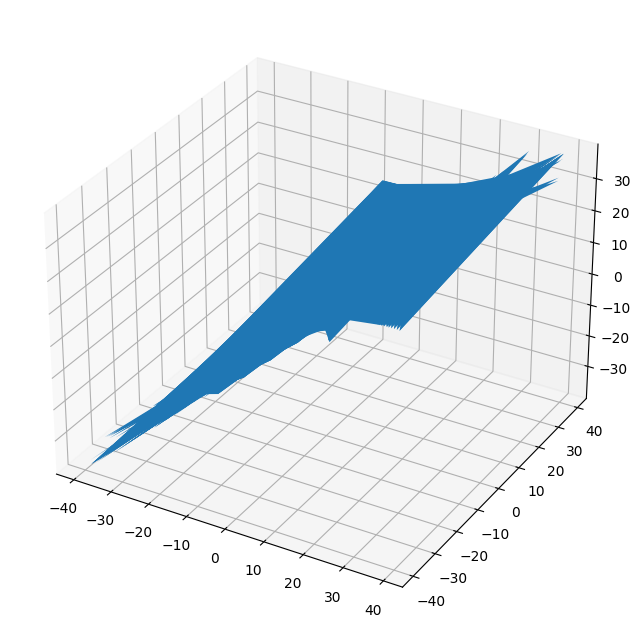

In [164]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import numpy as np
# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(path)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(np.swapaxes(your_mesh.vectors,1,2)))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

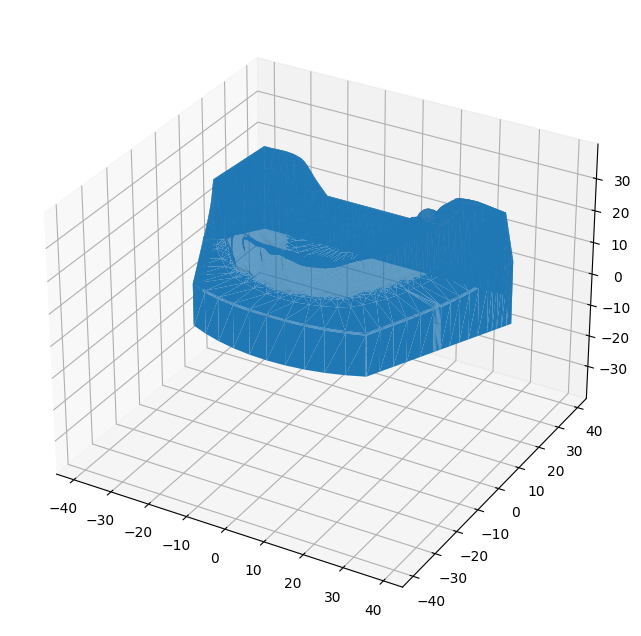

In [165]:
from stl import mesh
from mpl_toolkits import mplot3d
from matplotlib import pyplot
import numpy as np
# Create a new plot
figure = pyplot.figure()
axes = figure.add_subplot(projection='3d')

# Load the STL files and add the vectors to the plot
your_mesh = mesh.Mesh.from_file(path)
axes.add_collection3d(mplot3d.art3d.Poly3DCollection(np.rot90(your_mesh.vectors,2)))

# Auto scale to the mesh size
scale = your_mesh.points.flatten()
axes.auto_scale_xyz(scale, scale, scale)

# Show the plot to the screen
pyplot.show()

In [166]:
import numpy as np

# Initialize an empty graph
graph = {}

# Iterate through each triangle in the mesh
for i, triangle in enumerate(your_mesh.vectors):
    for j in range(3):
        vertex = tuple(triangle[j])
        # Add the vertex and its adjacent triangles to the graph
        if vertex not in graph:
            graph[vertex] = []
        graph[vertex].append(i)


In [167]:
your_mesh.vectors[:,:,2]

array([[22.625101, 22.595701, 22.6536  ],
       [22.625101, 22.6536  , 22.844702],
       [22.625101, 22.844702, 22.8498  ],
       ...,
       [16.082401, 16.082401, 16.082401],
       [15.8144  , 16.082401, 16.082401],
       [16.082401, 16.082401, 16.082401]], dtype=float32)

In [168]:
np.max(vertices[:,:,2])/15

4.031076049804687

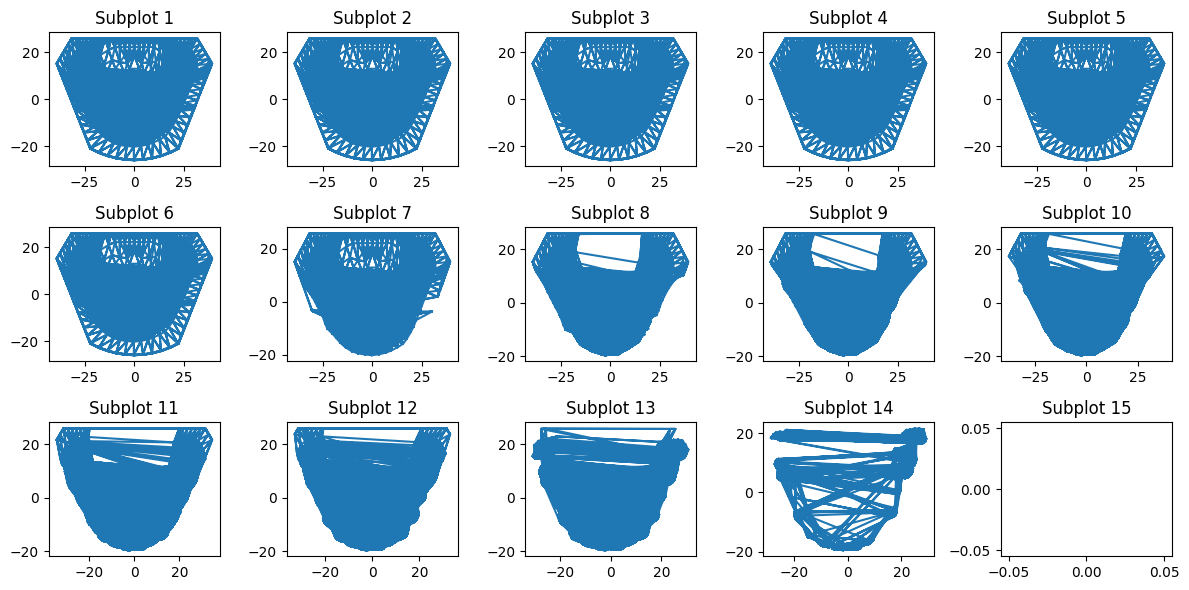

In [169]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# Extract vertices and faces from your_mesh
vertices = your_mesh.vectors
faces = [list(range(i, i + 3)) for i in range(0, len(vertices), 3)]

# Create a 3D plot of the object (optional)
#fig = plt.figure()
#ax = fig.add_subplot(111, projection='3d')
#ax.add_collection3d(mplot3d.art3d.Poly3DCollection(your_mesh.vectors))
#scale = your_mesh.points.flatten()
#ax.auto_scale_xyz(scale, scale, scale)
#ax.set_xlabel('X')
#ax.set_ylabel('Y')
#ax.set_zlabel('Z')

# Save 2D sections by projecting onto X, Y, and Z axes

# Create a figure with 2 rows and 5 columns
fig, axes = plt.subplots(3, 5, figsize=(12, 6))
step=np.max(vertices[:,:,2])/15
step_=step
z_section=30
# Loop to create and fill subplots
for i in range(3):
    for j in range(5):
        ax = axes[i, j]  # Get the current subplot
        x_section = vertices[(vertices[:,:,2]>step_)*(vertices[:,:,2]<(step_+z_section))]
        ax.plot(x_section[:,0], x_section[:,1])  # Example data, replace with your own
        ax.set_title(f'Subplot {i * 5 + j + 1}')  # Set subplot title
        step_+=step

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()



In [49]:
import open3d as o3d
path=r"C:\Users\Emman\Desktop\JE\Ortho\OrthoCAD_Export_64406802\64406802_shell_occlusion_l.stl"
mesh = o3d.io.read_triangle_mesh(path)
pointcloud = mesh.sample_points_poisson_disk(800000)

# you can plot and check
o3d.visualization.draw_geometries([mesh])
o3d.visualization.draw_geometries([pointcloud])

In [63]:
type(pointcloud)

open3d.cpu.pybind.geometry.PointCloud

In [62]:
type(mesh)

open3d.cpu.pybind.geometry.TriangleMesh

In [50]:
import numpy as np
import matplotlib.pyplot as plt
pcd = pointcloud

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=2.7, min_points=1000, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 1
point cloud has 1 clusters


In [61]:
import numpy as np
import matplotlib.pyplot as plt
pcd = pointcloud

with o3d.utility.VerbosityContextManager(
        o3d.utility.VerbosityLevel.Debug) as cm:
    labels = np.array(
        pcd.cluster_dbscan(eps=2, min_points=1200, print_progress=True))

max_label = labels.max()
print(f"point cloud has {max_label + 1} clusters")
colors = plt.get_cmap("tab20")(labels / (max_label if max_label > 0 else 1))
colors[labels < 0] = 0
pcd.colors = o3d.utility.Vector3dVector(colors[:, :3])
o3d.visualization.draw_geometries([pcd],
                                  zoom=0.455,
                                  front=[-0.4999, -0.1659, -0.8499],
                                  lookat=[2.1813, 2.0619, 2.0999],
                                  up=[0.1204, -0.9852, 0.1215])

[Open3D DEBUG] Precompute Neighbours
[Open3D DEBUG] Done Precompute Neighbours
[Open3D DEBUG] Compute Clusters
[Open3D DEBUG] Done Compute Clusters: 7
point cloud has 7 clusters
[Open3D WARNING] GLFW Error: WGL: Failed to make context current: The requested transformation operation is not supported. 


In [170]:
import cv2
import numpy as np

# Convert the X section to an image (assuming you have appropriate data)
# Example: Normalize the data to fit in the image (replace this with your data processing)
x_section_image = (x_section - x_section.min()) / (x_section.max() - x_section.min()) * 255
x_section_image = x_section_image.astype(np.uint8)
print("Canny")
# Apply Canny edge detection to the X section
edges = cv2.Canny(x_section_image, 50, 150)
print("Hough Circle Transform")
# Use Hough Circle Transform to detect circles in the X section
circles = cv2.HoughCircles(edges, cv2.HOUGH_GRADIENT, dp=1, minDist=20, param1=50, param2=30, minRadius=10, maxRadius=30)
print("Drawing")
if circles is not None:
    circles = np.uint16(np.around(circles))
    for circle in circles[0, :]:
        x, y, radius = circle[0], circle[1], circle[2]
        # Draw the circle on the X section
        cv2.circle(x_section_image, (x, y), radius, (0, 255, 0), 2)

# Display or save the X section with detected circles
cv2.imshow('Detected Circles in X Section', x_section_image)
cv2.waitKey(0)
cv2.destroyAllWindows()


ValueError: zero-size array to reduction operation minimum which has no identity

In [55]:
import cv2
import numpy as np

# Load the X section image (replace with your actual X section data)
x_section_image = np.array([...])  # Replace with your X section data

# Create ORB detectors
orb = cv2.ORB_create()

# Find keypoints and descriptors in the X section image
kp_x_section, des_x_section = orb.detectAndCompute(x_section_image, None)

# Convert the vertices of your_mesh to a list of (x, y) points
original_points = your_mesh.vertices[:, :2]

# Convert the original points to the format expected by OpenCV
original_points = original_points.astype(np.float32)

# Create a brute-force matcher
bf = cv2.BFMatcher(cv2.NORM_HAMMING, crossCheck=True)

# Match descriptors and find best matches
matches = bf.match(des_x_section, des_original)  # This line was incorrect

# Sort matches by distance
matches = sorted(matches, key=lambda x: x.distance)

# Define the number of best matches to use for transformation estimation
num_matches_to_use = 4  # You can adjust this number based on the quality of matches

# Extract matched keypoints from both images
matched_kp_original = [kp_x_section[match.queryIdx] for match in matches[:num_matches_to_use]]
matched_kp_x_section = [kp_x_section[match.trainIdx] for match in matches[:num_matches_to_use]]

# Convert matched keypoints to NumPy arrays
original_points = np.float32([kp.pt for kp in matched_kp_original])
x_section_points = np.float32([kp.pt for kp in matched_kp_x_section])

# Estimate the perspective transformation matrix
transformation_matrix, _ = cv2.findHomography(original_points, x_section_points, cv2.RANSAC)

# Print the estimated transformation matrix
print("Estimated Transformation Matrix:")
print(transformation_matrix)


In [ ]:
import numpy as np

# Define your bilinear transformation matrix (replace with your actual matrix)
transformation_matrix = np.array([[a, b, c],
                                  [d, e, f],
                                  [g, h, i]])

# Define a 2D point (replace with your actual point)
point_2d = np.array([x, y])

# Apply the bilinear transformation
transformed_point = np.dot(transformation_matrix, np.append(point_2d, 1))

# The transformed_point now contains the new (x', y') coordinates
x_new, y_new = transformed_point[:2]

In [ ]:
from collections import deque

# Define your 3D graph and markers (replace with your actual data)
graph = {...}  # Your 3D graph
markers = {...}  # Markers for teeth and nodes

# Implement a BFS-based segmentation algorithm (simplified example)
def bfs_segmentation(graph, markers):
    queue = deque()

    # Initialize the queue with markers
    for marker in markers:
        queue.append(marker)

    while queue:
        node = queue.popleft()
        # Process the node and update markers as needed
        # Add adjacent nodes to the queue for further processing

# Call the segmentation function
bfs_segmentation(graph, markers)
